<a href="https://colab.research.google.com/github/asabbah44/Text_Classification/blob/main/WordEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/mydatasetfinal.csv')


df1 = pd.DataFrame(df1, columns = ['commenttext','label'])
df2 = pd.DataFrame(df2, columns = ['commenttext','label'])

df=df2#pd.concat([df1,df2])
#df=df2

In [3]:
# possible_labels = df.label.unique()
# label_dict = {}
# for index, possible_label in enumerate(possible_labels):
#     label_dict[possible_label] = index
# print(label_dict)
# df['label'] = df.label.replace(label_dict)

# df.head()

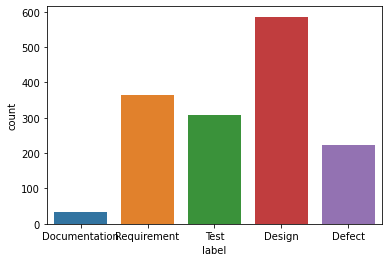

In [4]:
import seaborn as sns

sns.countplot(x='label', data=df)

In [5]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

from Utility import preprocess
# df["commenttext"] = df["commenttext"].apply(lambda x: x.lower())

# # Clean the text
# df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_text(x))

# # Clean numbers
# df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_numbers(x))

# # Clean Contractions
df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.replace_contractions(x))
 
# df["commenttext"] = df["commenttext"].apply(lambda x:preprocess.clean_punc(x))

# # lemmatize
df["commenttext"] = df["commenttext"].apply(lambda x: preprocess.lemmatize(x))
# # remove stop word and custome word such as todo
# df["commenttext"] = df["commenttext"].apply(lambda x: preprocess.custm_stopwords_remove(x))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [7]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [8]:
X = []
sentences = list(df['commenttext'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [9]:
X[2]

'added test case and implementation for'

Label encoder

In [10]:
df.label.unique()

array(['Documentation', 'Requirement', 'Test', 'Design', 'Defect'],
      dtype=object)

In [11]:
y = df['label']

y = np.array(list(map(lambda x: 0 if x=="Requirement" else 1 if x=="Design" else 2 if x=="Defect" else 3 if x=="Test" else 4, y)))


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [13]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train.values)
# y_test = le.transform(y_test.values)

In [14]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
all_words = []
for sent in X:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
unique_words = set(all_words)

No_Of_Words=(len(unique_words))
print(No_Of_Words)

4520


In [16]:
tokenizer = Tokenizer(num_words=No_Of_Words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [17]:
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(df.commenttext, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
print(length_long_sentence)

1394


In [18]:
MaxWordsLen=length_long_sentence

In [19]:
vocab_size = len(tokenizer.word_index) + 1

# max number of words in sentencecs
maxlen = MaxWordsLen

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)



In [20]:
vocab_size 

3417

Chose which model to use

In [21]:
model_type=2 # 2-word2vec , 1- Glove, 
EMBEDDING_DIM=100

In [22]:
from numpy import array
from numpy import asarray
from numpy import zeros
import gensim
from gensim import corpora, models, similarities

embeddings_dictionary = dict()
if(model_type==1) :

 glove_file = open('/content/drive/MyDrive/Colab Notebooks/glove.840B.300d.txt', encoding="utf8")

 for line in glove_file:
    records = line.split(" ")
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
 glove_file.close()

elif (model_type==2):
 w2v_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/Data/test.bin', binary=True)
 word_vectors = w2v_model
 word_index = tokenizer.word_index
 for word, i in word_index.items():
    if i>=No_Of_Words:
        continue
    try:
        embedding_vector = word_vectors[word]
        embeddings_dictionary[word] = embedding_vector
    except KeyError:
      continue
      #  embeddings_dictionary[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

 del(word_vectors)

elif (model_type==3):
       !pip install tqdm
       from gensim.models.wrappers import FastText
       from tqdm import tqdm
       print('loading FastText word embeddings...')
       embeddings_index = {}
       f = open('/content/drive/MyDrive/Colab Notebooks/crawl-300d-2M.vec',encoding='utf-8')
       for line in tqdm(f):
        values = line.strip().rsplit(' ')
        word = values[0]
        vector_dimensions = np.asarray(values[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions
       f.close()
else:
   print("No Model")

In [23]:
WordsNotInclude=[]
embedding_matrix = zeros((vocab_size,  EMBEDDING_DIM))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
    else : WordsNotInclude.append(word)

In [24]:
len(WordsNotInclude)

575

In [25]:
print(embeddings_dictionary.get(1))

None


ANN

In [26]:
model = Sequential()
embedding_layer = Embedding(vocab_size, EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(5, activation='softmax'))

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1394, 100)         341700    
_________________________________________________________________
flatten (Flatten)            (None, 139400)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 697005    
Total params: 1,038,705
Trainable params: 697,005
Non-trainable params: 341,700
_________________________________________________________________
None


In [28]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced',classes=["Requirement","Design","Defect","Test","Documentation"],y=df.label)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.8313186813186814,
 1: 0.5163822525597269,
 2: 1.3630630630630631,
 3: 0.9824675324675325,
 4: 9.16969696969697}

In [29]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
8/8 [==============================] - 4s 81ms/step - loss: 1.5122 - acc: 0.3193 - val_loss: 1.2650 - val_acc: 0.5579
Epoch 2/6
8/8 [==============================] - 0s 32ms/step - loss: 1.0782 - acc: 0.6324 - val_loss: 1.1589 - val_acc: 0.6529
Epoch 3/6
8/8 [==============================] - 0s 24ms/step - loss: 0.9026 - acc: 0.7622 - val_loss: 1.0979 - val_acc: 0.6529
Epoch 4/6
8/8 [==============================] - 0s 25ms/step - loss: 0.7865 - acc: 0.7785 - val_loss: 1.0668 - val_acc: 0.6694
Epoch 5/6
8/8 [==============================] - 0s 24ms/step - loss: 0.6807 - acc: 0.7937 - val_loss: 1.0468 - val_acc: 0.6736
Epoch 6/6
8/8 [==============================] - 0s 25ms/step - loss: 0.6397 - acc: 0.8079 - val_loss: 1.0348 - val_acc: 0.6653


In [30]:
score = model.evaluate(X_test, y_test, verbose=1)

10/10 [==============================] - 0s 5ms/step - loss: 0.9374 - acc: 0.6931


In [31]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.9374395608901978
Test Accuracy: 0.6930692791938782


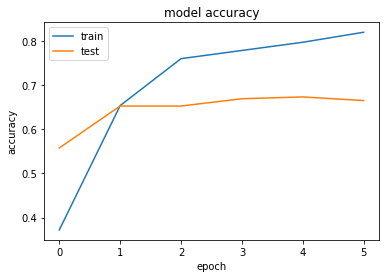

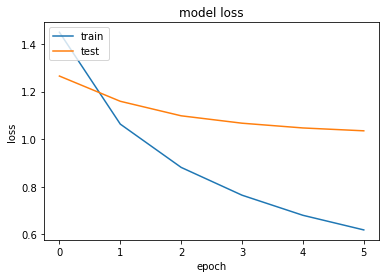

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

Simple CNN

In [50]:
from keras.layers import Conv1D, MaxPooling1D, Embedding
model = Sequential()

embedding_layer = Embedding( vocab_size, EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen , trainable=True)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [51]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1394, 100)         341700    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1390, 128)         64128     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
Total params: 406,473
Trainable params: 406,473
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
history1 = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2 )

score = model.evaluate(X_test, y_test, verbose=1)


Epoch 1/10
8/8 [==============================] - 1s 97ms/step - loss: 1.5468 - acc: 0.4016 - val_loss: 0.9324 - val_acc: 0.7025
Epoch 2/10
8/8 [==============================] - 1s 69ms/step - loss: 0.8947 - acc: 0.6795 - val_loss: 0.8247 - val_acc: 0.7190
Epoch 3/10
8/8 [==============================] - 1s 68ms/step - loss: 0.7039 - acc: 0.7474 - val_loss: 0.7863 - val_acc: 0.7314
Epoch 4/10
8/8 [==============================] - 1s 67ms/step - loss: 0.6094 - acc: 0.7885 - val_loss: 0.7618 - val_acc: 0.7521
Epoch 5/10
8/8 [==============================] - 1s 69ms/step - loss: 0.5560 - acc: 0.7924 - val_loss: 0.7553 - val_acc: 0.7603
Epoch 6/10
8/8 [==============================] - 1s 68ms/step - loss: 0.4522 - acc: 0.8566 - val_loss: 0.7487 - val_acc: 0.7438
Epoch 7/10
8/8 [==============================] - 1s 68ms/step - loss: 0.4309 - acc: 0.8676 - val_loss: 0.7428 - val_acc: 0.7603
Epoch 8/10
8/8 [==============================] - 1s 69ms/step - loss: 0.3874 - acc: 0.8881 - val

In [53]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.641559362411499
Test Accuracy: 0.7623762488365173


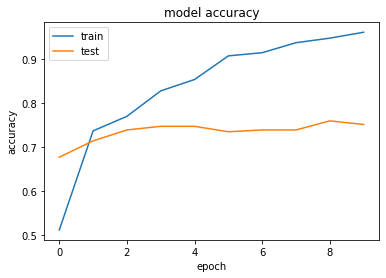

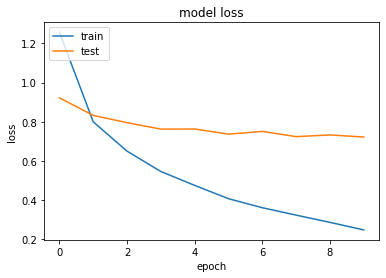

In [37]:
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

 CNN Functinal 

In [38]:
from keras.layers import Input
from keras.models import Model

cnn_model = Sequential()
embedding_layer = Embedding( vocab_size, EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen , trainable=True)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(filters = 128, kernel_size = 2, activation = "relu"))
cnn_model.add(MaxPooling1D(pool_size = 2))
cnn_model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
cnn_model.add(MaxPooling1D(pool_size = 2))
cnn_model.add(Conv1D(filters = 128, kernel_size = 4, activation = "relu"))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dense(units = 5, activation = 'softmax'))


In [39]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1394, 100)         341700    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1393, 128)         25728     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 696, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 694, 128)          49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 347, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 344, 128)          65664     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)              

In [40]:
#Configures the model for training
cnn_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["acc"])
#Split the dataset into train and validation set for training and evaludating the model
# X_train, X_val, y_train, y_val = train_test_split(trainvalid_data, train_labels, shuffle = True, random_state = 123)
# print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
#Trains the model for a fixed number of epochs (iterations on a dataset)
history = cnn_model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_split=0.2)
score = cnn_model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
8/8 [==============================] - 2s 139ms/step - loss: 1.5032 - acc: 0.3170 - val_loss: 1.2735 - val_acc: 0.5868
Epoch 2/10
8/8 [==============================] - 1s 82ms/step - loss: 1.2174 - acc: 0.5578 - val_loss: 1.0180 - val_acc: 0.6529
Epoch 3/10
8/8 [==============================] - 1s 82ms/step - loss: 0.8536 - acc: 0.7075 - val_loss: 0.9745 - val_acc: 0.6860
Epoch 4/10
8/8 [==============================] - 1s 81ms/step - loss: 0.7031 - acc: 0.7308 - val_loss: 0.8711 - val_acc: 0.7149
Epoch 5/10
8/8 [==============================] - 1s 81ms/step - loss: 0.6001 - acc: 0.7852 - val_loss: 0.8665 - val_acc: 0.7190
Epoch 6/10
8/8 [==============================] - 1s 83ms/step - loss: 0.5349 - acc: 0.7933 - val_loss: 0.8539 - val_acc: 0.7190
Epoch 7/10
8/8 [==============================] - 1s 82ms/step - loss: 0.4003 - acc: 0.8572 - val_loss: 0.8549 - val_acc: 0.7438
Epoch 8/10
8/8 [==============================] - 1s 81ms/step - loss: 0.3237 - acc: 0.8974 - va

In [41]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6791965365409851
Test Accuracy: 0.7854785323143005


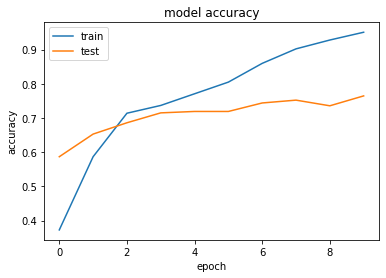

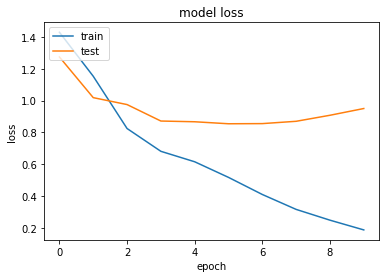

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

LSTM

In [43]:
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
X_train

array([[   3,    5,    4, ...,    0,    0,    0],
       [   3,   10,   24, ...,    0,    0,    0],
       [   3,   78,   88, ...,    0,    0,    0],
       ...,
       [3403,    1,   82, ...,    0,    0,    0],
       [   3,   73, 1217, ...,    0,    0,    0],
       [ 688,  105,   12, ...,    0,    0,    0]], dtype=int32)

In [45]:

clf = SVC()
# train the model
clf.fit(X_train, y_train)
# use the model to predict the testing instances
y_pred = clf.predict(np.array(X_test))
# generate the classification report
print(classification_report(y_test, y_pred))
print('accuracy %s' % accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.35      0.53      0.43        83
           1       0.47      0.60      0.52       126
           2       0.50      0.11      0.18        27
           3       0.62      0.13      0.22        60
           4       0.00      0.00      0.00         7

    accuracy                           0.43       303
   macro avg       0.39      0.27      0.27       303
weighted avg       0.46      0.43      0.39       303

accuracy 0.429042904290429


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

# score = model.evaluate(X_test, y_test, verbose=1)

In [47]:
# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])